##  Analysis of IMDB Top 250 Movies

### About Dataset
This dataset is having the data of the top 250 Movies as per their IMDB rating listed on the official website of IMDB

Features:

- rank - Movie Rank as per IMDB rating
- movie_id - Movie ID
- title - Name of the Movie
- year - Year of Movie release
- link - URL for the Movie
- imdb_votes - Number of people who voted for the IMDB rating
- imdb_rating - Rating of the Movie
- certificate - Movie Certification
- duration - Duration of the Movie
- genre - Genre of the Movie
- cast_id - ID of the cast member who have worked on the Movie
- cast_name - Name of the cast member who have worked on the Movie
- director_id - ID of the director who have directed the Movie
- director_name - Name of the director who have directed the Movie
- writer_id - ID of the writer who have wrote script for the Movie
- writer_name - Name of the writer who have wrote script for the Movie
- storyline - Storyline of the Movie
- user_id - ID of the user who wrote review for the Movie
- user_name - Name of the user who wrote review for the Movie
- review_id - ID of the user review
- review_title - Short review
- review_content - Long review


## Import Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Q1. Check and remove missing data
 
### A. Write a Python code snippet that checks for missing values in each column of the dataset. If any, only display the names of the columns with missing values and their corresponding number of missing values. Print the length of the data before removing the missing data.

In [3]:
df = 'movies.csv'
df = pd.read_csv(df)


In [4]:
#count number of missing values
missing_values = df.isnull().sum()

# columns with missing values
missing_columns = missing_values[missing_values > 0 ]

# display names of colums with missing values and their corresponding values

if not missing_columns.empty:
    print("Columns with missing values:", {col_name: num_missing for col_name, num_missing in missing_columns.items()})


Columns with missing values: {'certificate': 1}


In [5]:
#the length of the data before removing the missing data.
print ("The length of the resulting dataset before removing the missing data:")
print (len(df))

The length of the resulting dataset before removing the missing data:
250


 ### B. Remove any row that contains at least one missing value, and output the length of the resulting cleaned dataset

In [6]:
df2 = df.dropna()
print ("The length of the cleaned dataset is:" , len(df2))


The length of the cleaned dataset is: 249


In [7]:
df2.describe()

,rank,year,imbd_rating
count,249.000000,249.000000,249.000000
mean,125.694779,1986.381526,8.306426
std,72.392880,25.173651,0.229390
min,1.000000,1921.000000,8.000000
25%,63.000000,1966.000000,8.100000
50%,126.000000,1994.000000,8.200000
75%,188.000000,2006.000000,8.400000
max,250.000000,2022.000000,9.300000


### C. Calculate the length of imbd_rating that are between 8.0 and 9.3 and then plot a scatter plot to show the relationship between the movie_id and corresponding  imbd rating. 
The range of rating should  be between the min and max value of imbd rating i.e. 8.0 to 9.3

In [8]:
#X = ((df2[df2['imbd_rating']] > 8.0 & df2[df2['imbd_rating']] < 9.3)) 
X = df2[(df2['imbd_rating'] > 8.0) & (df2['imbd_rating'] < 9.3)]
len(X)

243

<AxesSubplot:xlabel='movie_id'>

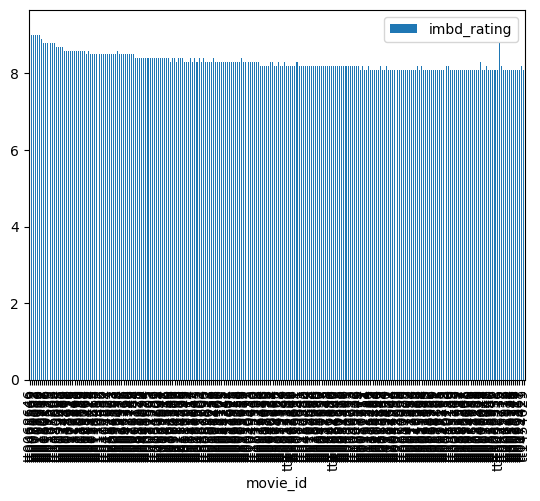

In [9]:
X.plot(x='movie_id', y='imbd_rating', kind='bar')

## 2. genre processing


### A. Please write a code snippet to confirm unique movie genres present in the data.

In [10]:
unique_genre = df2['genre'].nunique()
print(f'The total number of unique movie genres in the  data are:' ,unique_genre)


The total number of unique movie genres in the  data are: 104


<AxesSubplot:title={'center':'imbd_rating'}, xlabel='genre'>

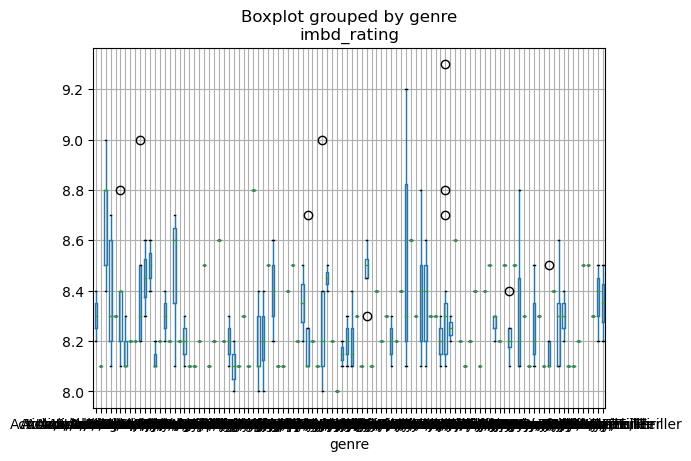

In [11]:
df2.boxplot("imbd_rating" , by="genre")

### B. Now, display ALL Rows of the movie genres count data. That is to count and print the number of occurrences for each genre.

In [12]:
rating_item = df2['genre'].value_counts()
#display ALL Rows of the business category count data. 

pd.options.display.max_rows = None
rating_item

Drama                         19
Crime,Drama                   14
Animation,Adventure,Comedy    10
Crime,Drama,Mystery            9
Biography,Drama,History        9
Drama,War                      7
Drama,Romance                  6
Crime,Drama,Thriller           5
Animation,Action,Adventure     5
Action,Adventure,Fantasy       5
Action,Adventure,Sci-Fi        5
Action,Crime,Drama             5
Action,Adventure,Drama         5
Drama,Thriller                 4
Biography,Crime,Drama          4
Comedy,Drama                   4
Comedy,Drama,Romance           4
Drama,Mystery,Thriller         4
Adventure,Drama,War            3
Mystery,Thriller               3
Drama,Romance,War              3
Crime,Thriller                 3
Drama,Mystery                  3
Action,Sci-Fi                  3
Adventure,Biography,Drama      3
Animation,Adventure,Family     3
Action,Drama,Sci-Fi            3
Action,Biography,Drama         3
Comedy,Romance                 2
Drama,Sport                    2
Comedy,Cri

### C. Remove categories that appear fewer than 10 times. Write a Python code snippet to perform this operation. At last, print the number of resulting unique business_categories.

In [13]:
count = df2['genre'].value_counts()
less_than10 = count[count >= 10].index
df2 = df2[df2['genre'].isin(less_than10)]
len(df2)

43

# Q3. Training a LinearRegression model on the data

### A. Build a linear regression model on a subset of the data, using the 'Rank' column as the input variable and the 'imbd_rating' column as the output variable. Split the data into a training set and a test set, with 70% of the data used for training. 

In [14]:
X = df2[['rank']]
y = df2[['imbd_rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = reg.predict(X_test)


In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)
print ('Mean squared error is:', mean_squared_error(y_test, y_pred))

Mean squared error is: 0.0849490394420113


In [18]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print ('rmse is:', rmse)

rmse is: 0.2914601850030486


### B. Assuming that the number of reviews a movie has received review_content_count can greatly influence the average rating that the movie can get. Create the relevant variable to the data, and do the LinearRegression again to the imbd_rating

In [19]:
review_count = df2.groupby('movie_id')['review_content'].count().reset_index()
review_count

,movie_id,review_content
0,tt0032551,1
1,tt0040522,1
2,tt0042192,1
3,tt0044741,1
4,tt0046438,1
5,tt0048473,1
6,tt0050083,1
7,tt0053198,1
8,tt0056592,1
9,tt0061512,1


In [20]:
movie_review_count= review_count.rename(columns={'review_content' : "review_content_count"})
movie_review_count.head()

,movie_id,review_content_count
0,tt0032551,1
1,tt0040522,1
2,tt0042192,1
3,tt0044741,1
4,tt0046438,1


In [21]:
new_merged_data = pd.merge(df2 ,movie_review_count, on='movie_id')
new_merged_data

,rank,movie_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content,review_content_count
0,1,tt0111161,The Shawshank Redemption,1994,https://www.imdb.com/title/tt0111161,"2,711,075",9.3,R,2h 22m,Drama,...,Frank Darabont,"nm0000175,nm0001104","Stephen King,Frank Darabont","Over the course of several years, two convicts...","ur16161013,ur15311310,ur0265899,ur16117882,ur1...","hitchcockthelegend,Sleepin_Dragon,EyeDunno,ale...","rw2284594,rw6606154,rw1221355,rw1822343,rw1288...","Some birds aren't meant to be caged.,An incred...",The Shawshank Redemption is written and direct...,1
1,2,tt0068646,The Godfather,1972,https://www.imdb.com/title/tt0068646,"1,882,829",9.2,R,2h 55m,"Crime,Drama",...,Francis Ford Coppola,"nm0701374,nm0000338","Mario Puzo,Francis Ford Coppola",The aging patriarch of an organized crime dyna...,"ur24740649,ur86182727,ur15794099,ur15311310,ur...","CalRhys,andrewburgereviews,gogoschka-1,Sleepin...","rw3038370,rw4756923,rw4059579,rw6568526,rw1897...","The Pinnacle Of Flawless Films!,An offer so go...",'The Godfather' is the pinnacle of flawless fi...,1
2,4,tt0071562,The Godfather Part II,1974,https://www.imdb.com/title/tt0071562,"1,285,350",9.0,R,3h 22m,"Crime,Drama",...,Francis Ford Coppola,"nm0000338,nm0701374","Francis Ford Coppola,Mario Puzo",The early life and career of Vito Corleone in ...,"ur0176092,ur0688559,ur92260614,ur0200644,ur117...","Nazi_Fighter_David,tfrizzell,umunir-36959,DanB...","rw0135607,rw0135487,rw5049900,rw0135526,rw0135...",Breathtaking in its scope and tragic grandeur....,"Coppola's masterpiece is rivaled only by ""The ...",1
3,5,tt0050083,12 Angry Men,1957,https://www.imdb.com/title/tt0050083,"800,954",9.0,Approved,1h 36m,"Crime,Drama",...,Sidney Lumet,nm0741627,Reginald Rose,The jury in a New York City murder trial is fr...,"ur1318549,ur0643062,ur0688559,ur20552756,ur945...","uds3,tedg,tfrizzell,TheLittleSongbird,henrique...","rw0060044,rw0060025,rw0060034,rw2262425,rw5448...","The over-used term ""classic movie"" really come...",This once-in-a-generation masterpiece simply h...,1
4,8,tt0110912,Pulp Fiction,1994,https://www.imdb.com/title/tt0110912,"2,081,489",8.9,R,2h 34m,"Crime,Drama",...,Quentin Tarantino,"nm0000233,nm0000812","Quentin Tarantino,Roger Avary","The lives of two mob hitmen, a boxer, a gangst...","ur0556667,ur76062573,ur118818818,ur15794099,ur...","kylopod,bevo-13678,SebMoz,gogoschka-1,gautamma...","rw1218264,rw5590710,rw6261036,rw3055511,rw5626...","The masterpiece without a message,Shotguns,A m...","One of the early scenes in ""Pulp Fiction"" feat...",1
5,12,tt0137523,Fight Club,1999,https://www.imdb.com/title/tt0137523,"2,154,995",8.8,R,2h 19m,Drama,...,David Fincher,"nm0657333,nm0880243","Chuck Palahniuk,Jim Uhls",An insomniac office worker and a devil-may-car...,"ur113529171,ur2860723,ur0482513,ur15794099,ur2...","Pukeonthestreet,grantss,Leofwine_draca,gogosch...","rw5476552,rw3001234,rw3504332,rw2923012,rw2251...","A great movie you can watch again and again,Su...",Because you'll probably be confused the first ...,1
6,18,tt0073486,One Flew Over the Cuckoo's Nest,1975,https://www.imdb.com/title/tt0073486,"1,017,354",8.7,18+,2h 13m,Drama,...,Milos Forman,"tt0073486,nm0369142,nm0325743,nm0450181,tt0073486","Writers,Lawrence Hauben,Bo Goldman,Ken Kesey,","In the Fall of 1963, a Korean War veteran and ...","ur4409266,ur3728510,ur2093818,ur3922673,ur8949...","Wuchakk,pyrocitor,TBJCSKCNRRQTreviews,philip_v...","rw2692389,rw0998871,rw0143219,rw0143229,rw4245...",The spirit of freedom vs. the spirit of legal-...,"Set in the early 60s, the story involves R.P. ...",1
7,24,tt0317248,City of God,2002,https://www.imdb.com/title/tt0317248,"763,772",8.6,R,2h 10m,"Crime,Drama",...,"Fernando Meirelles,Kátia Lund","nm0513130,nm1130251","Paulo Lins,Bráulio Mantovani","In the slums of Rio, two kids' paths diverge a...","ur20552756,ur1793363,ur2898520,ur2950767,ur441.

In [22]:
X = new_merged_data[['review_content_count']]
y = new_merged_data['imbd_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [23]:
mean_squared_error(y_test, y_pred)
print ('Mean squared error is:', mean_squared_error(y_test, y_pred))

Mean squared error is: 0.11424145013267681


### Q4 Apply the kMeans clustering method to this data. The first step is to select just the numerical fields in the data. The first task is to find out what the members of each cluster are. To do this, generate a set of cluster labels using km.predict() on your original data and add this to the data frame. Now, explore the difference between each cluster:

- find the mean value for each column by cluster
- from these means, can you characterise the three clusters that were found
- Identify two columns that seem to be more distinct between clusters, use these to plot the data with different colours for each cluster to visualise the result of clustering. Comment on the separation of clusters in your plot.
- Repeat the experiment with a larger number of clusters. Do more clusters make it easier to distinguish the clusters?

In [24]:
new_df = df.select_dtypes(include=['float64' , 'int64'])
new_df


,rank,year,imbd_rating
0,1,1994,9.3
1,2,1972,9.2
2,3,2008,9.0
3,4,1974,9.0
4,5,1957,9.0
5,6,1993,9.0
6,7,2003,9.0
7,8,1994,8.9
8,9,2001,8.8
9,10,1966,8.8


In [25]:
#apply the kMeans clustering function to the data
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=3)
kmeans.fit(new_df)
label = kmeans.labels_
new_df["Cluster"] = label

new_df

,rank,year,imbd_rating,Cluster
0,1,1994,9.3,2
1,2,1972,9.2,2
2,3,2008,9.0,2
3,4,1974,9.0,2
4,5,1957,9.0,2
5,6,1993,9.0,2
6,7,2003,9.0,2
7,8,1994,8.9,2
8,9,2001,8.8,2
9,10,1966,8.8,2


In [26]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(new_df)

labels = kmeans.predict(new_df)
df["Cluster"] = labels

print(df["Cluster"].value_counts())

0    85
1    83
2    82
Name: Cluster, dtype: int64


In [27]:
mean = df.groupby("Cluster").mean()
print(mean)

          rank         year  imbd_rating
Cluster                                 
0        208.0  1984.647059     8.117647
1        124.0  1985.590361     8.250602
2         41.5  1988.914634     8.559756


- Cluster 0 is first stage movies that has the lowest rank and highest imbd rating 
- Cluster 1 is the second stage movies with highest rank with lowest imbd rating 
- Cluster 2 is the third stage movies that have moderate ranking but more imbd rating than cluster 1


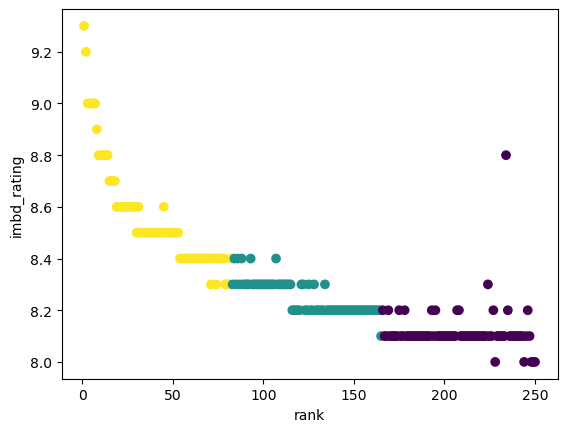

In [28]:
plt.scatter(df['rank'], df['imbd_rating'], c=kmeans.labels_)
plt.xlabel('rank')
plt.ylabel('imbd_rating')
plt.show()

### Repeat the experiment with a larger number of clusters. 

We can see that the different clusters are  not fairly well-separated in this plot

In [29]:
kmeans = KMeans(n_clusters=15)
kmeans.fit(new_df)

labels = kmeans.predict(new_df)
df["Cluster"] = labels

print(df["Cluster"].value_counts())

4     28
7     24
1     23
13    20
8     19
10    17
0     16
12    15
9     14
3     13
14    13
6     13
5     13
11    12
2     10
Name: Cluster, dtype: int64


In [30]:
mean = df.groupby("Cluster").mean()
print(mean)

               rank         year  imbd_rating
Cluster                                      
0        144.562500  1996.312500     8.200000
1         45.826087  1997.695652     8.473913
2        209.000000  1979.800000     8.100000
3         93.846154  1979.230769     8.323077
4         15.142857  1991.428571     8.782143
5        234.384615  1953.384615     8.130769
6        146.153846  1958.153846     8.207692
7        171.375000  2005.208333     8.137500
8        118.684211  2007.578947     8.252632
9         48.000000  1951.500000     8.485714
10       236.000000  2000.588235     8.117647
11       192.000000  1943.666667     8.133333
12       204.733333  2010.400000     8.100000
13        77.650000  2008.350000     8.360000
14       103.615385  1947.461538     8.300000


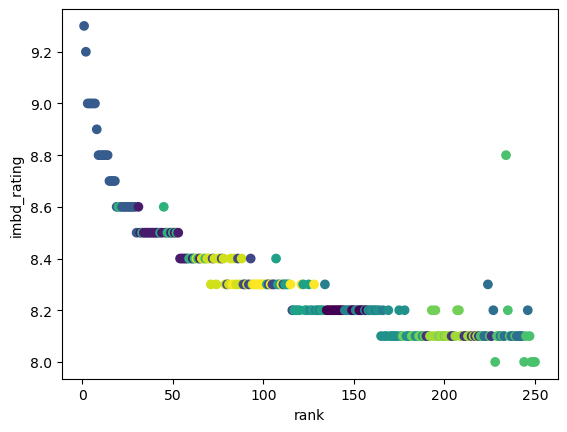

In [31]:
plt.scatter(new_df['rank'], df['imbd_rating'], c=kmeans.labels_)
plt.xlabel('rank')
plt.ylabel('imbd_rating')
plt.show()

## Do more clusters make it easier to distinguish the clusters?
No, it doesnt make it easier to distingish the clusters. 

# Q5 Hierarchical Clustering
Since we don't know how many clusters there should be in the data, a better approach is to use Hierarchical clustering and examine the dendograph to understand what natural clusters are present in the data.

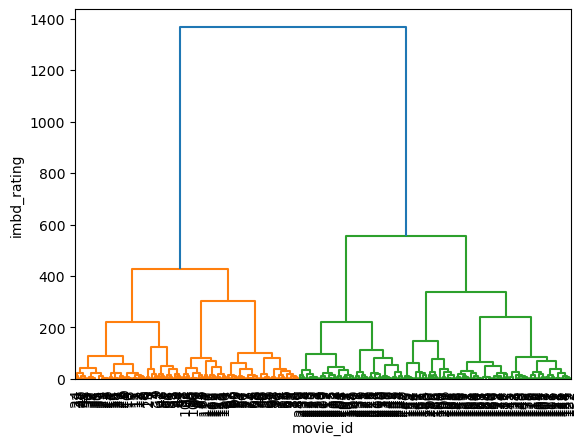

In [32]:
from scipy.cluster.hierarchy import linkage, dendrogram

# perform hierarchical clustering
Z = linkage(new_df, method='ward')

# plot the dendrogram
dendrogram(Z, labels=new_df.index, leaf_rotation=90, leaf_font_size=10)
plt.xlabel('movie_id')
plt.ylabel('imbd_rating')
plt.show()

In [33]:
#to chracterize cluseters
import numpy as np

# determine cluster labels for each Pokemon based on the dendrogram
from scipy.cluster.hierarchy import fcluster
max_dist = 200
cluster_labels = fcluster(Z, max_dist, criterion='distance')

# add cluster labels to the original data frame
new_df['Cluster'] = cluster_labels

# calculate mean values for each cluster
cluster_means = new_df.groupby('Cluster').mean()
print(cluster_means)


               rank         year  imbd_rating
Cluster                                      
1         23.722222  1998.083333     8.666667
2         38.500000  1955.000000     8.600000
3        107.863636  1954.681818     8.286364
4         71.864865  1999.540541     8.381081
5        216.142857  2007.607143     8.125000
6        231.480000  1967.680000     8.100000
7        174.230769  1955.384615     8.161538
8        169.111111  2005.111111     8.144444
9        124.548387  2003.225806     8.238710


# Q5 a. K-Nearest Neighbours Classifier


In [34]:
new_df['imbd_rating'] = pd.cut(new_df['imbd_rating'], bins=3, labels=['low', 'medium', 'high'])

In [35]:
X = new_df[['rank']]
y = new_df[['imbd_rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=142)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (187, 1)
y_train shape: (187, 1)
X_test shape: (63, 1)
y_test shape: (63, 1)


In [36]:
# Import the KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Build a KNN classifier model
clf_knn = KNeighborsClassifier(n_neighbors=1)

# Train the model with the training data
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## 5b. Write code to calculate the accuracy score


In [37]:
from sklearn.metrics import accuracy_score
y_pred = clf_knn.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy is:" , accuracy)

Accuracy is: 0.9841269841269841


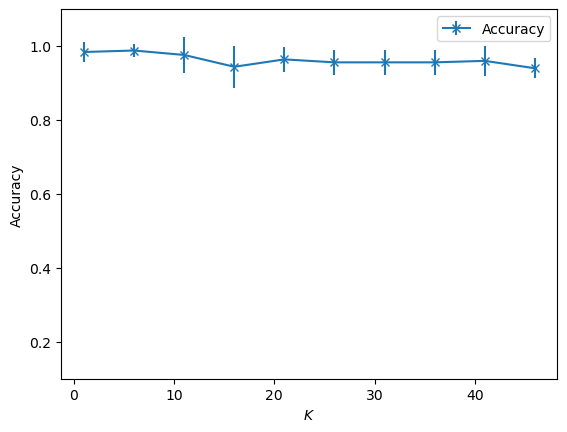

In [38]:
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

cv_scores = []
cv_scores_std = []
k_range = range(1, 50, 5)
for i in k_range:
    clf = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(clf,X, y, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

# Plot the relationship
plt.errorbar(k_range, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')
plt.ylim([0.1, 1.1])
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


## 5c. Check against the figure plotted above to see if the selected hyperparameter $K$ can lead to the highest misclassification accuracy. 

In [39]:
from sklearn.model_selection import GridSearchCV
parameter_grid = {'n_neighbors' : range(1,50,5)}
knn_clf = KNeighborsClassifier()
gs_knn = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy' , cv=KFold(n_splits=10, shuffle=True))
gs_knn.fit(X, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50, 5)}, scoring='accuracy')

In [40]:
print("best value for n_neighbors" , gs_knn.best_params_['n_neighbors'])


best value for n_neighbors 11


# 6.  Gaussian Naive Bayes

Create and training a Gaussian Naive Bayes classifier model. Then use the model to predict testing data. Explore the learned probability (model parameters). Lastly use 10-fold cross validation to show a more robust prediction accuracy.

In [41]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

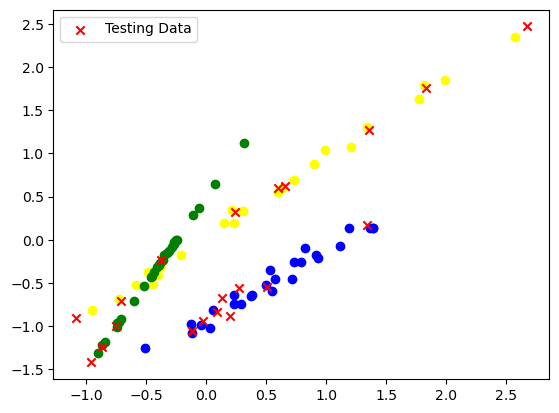

In [42]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=3, n_clusters_per_class=1, 
                           weights=None, flip_y=0.01, class_sep=0.5, hypercube=True,
                           shift=0.0, scale=1.0, shuffle=True, random_state=42)

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Visualize the generated data
colors = ['blue', 'yellow', 'green']
for i, color in enumerate(colors):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], c=color)
plt.scatter(X_test[:, 0], X_test[:,1], c='red', marker='x', label='Testing Data')
plt.legend(loc='best')
plt.show()

In [43]:
# Create and training a Gaussian Naive Bayes classifier model
clf = GaussianNB()
clf.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy is: %.4f\n' % accuracy)

Testing accuracy is: 0.7500



In [44]:
# Explore the learned probability (model parameters)
print('Estimated probability of classess: \n', clf.class_prior_)
print('Estimated mean for each Gaussian distribution: \n', clf.theta_)
print('Estimated variance for each Gaussian distribution: \n', clf.sigma_)

Estimated probability of classess: 
 [0.325  0.3125 0.3625]
Estimated mean for each Gaussian distribution: 
 [[ 0.5508401  -0.48063246]
 [ 0.44640141  0.43838299]
 [-0.41484025 -0.33233618]]
Estimated variance for each Gaussian distribution: 
 [[0.24940784 0.16208628]
 [0.85696063 0.73986627]
 [0.07607725 0.30208004]]


In [52]:
# Use 10-fold cross validation to show a more robust prediction accuracy
clf = GaussianNB()
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
print('Gaussian Naive Bayes accuracy range: [%.4f, %.4f]; mean: %.4f; std: %.4f\n' % (scores.min(), scores.max(), scores.mean(), scores.std()))

Gaussian Naive Bayes accuracy range: [0.6000, 0.9000]; mean: 0.7700; std: 0.0900



# 7. Multinomial Naive Bayes

By using Multinomial Naive Bayes create and train the model and find the accuracy score.

In [53]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
coded_data = enc.fit_transform(new_df)

X = coded_data[:, 0:-1]
y = coded_data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [54]:
# Creat and train a model
from sklearn.naive_bayes import MultinomialNB
clf_mnb = MultinomialNB()
clf_mnb.fit(X_train, y_train)

MultinomialNB()

In [55]:
# Evaluate the model
y_pred = clf_mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is: %.4f\n' % accuracy)

Accuracy is: 0.6349



## Q8. Compare the prediction accuaracy between KNN clasifier and Gaussian Naive Bayes. Use 10-cross validation to report the accuracy mean and standard deviation. Which classification model is more accurate on movie data set? 

In [56]:
X = new_df[['rank']]
y = new_df[['imbd_rating']]

In [57]:
clf_knn = KNeighborsClassifier(n_neighbors=11)
clf_gnb = GaussianNB()
score_knn = cross_val_score(clf_knn, X,y ,scoring='accuracy', cv=10)
score_gnb = cross_val_score(clf_gnb, X, y, scoring='accuracy', cv=10)

In [58]:
print("For KNN, the score of mean and std:" , score_knn.mean(), score_knn.std())

For KNN, the score of mean and std: 0.9360000000000002 0.1561537703675451


In [59]:
print("For GaussianNB, the score of mean and std:" , score_gnb.mean(), score_gnb.std())

For GaussianNB, the score of mean and std: 0.9039999999999999 0.2264155471693585


The performance of KNN is better than GaussianNB since the mean of KNN higher than GaussianNB i.e. 93% which means its more accurate.
However, the std of KNN is higher than that of GaussianNB, therefore KNN classifer can be less consistent across different test datasets.